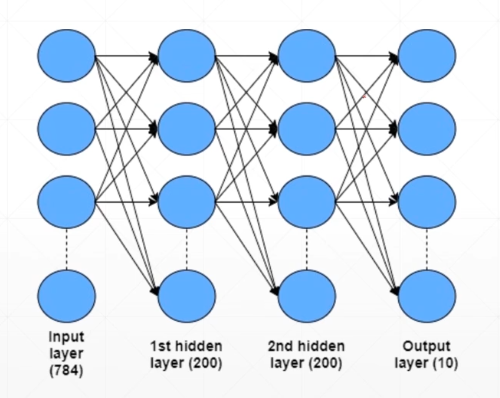
十层代表有十分类

In [1]:
import torch
from torch.nn import functional as F

In [2]:
# 新建线性层
w1,b1=torch.randn(200,784,requires_grad=True),torch.zeros(200,requires_grad=True) # 第一个是ch_out，第二个是ch_in
w2,b2=torch.randn(200,200,requires_grad=True),torch.zeros(200,requires_grad=True)
w3,b3=torch.randn(10,200,requires_grad=True),torch.zeros(10,requires_grad=True)

In [3]:
def forward(x):
    x=x@w1.t()+b1
    x=F.relu(x)
    x=x@w2.t()+b2
    x=F.relu(x)
    x=x@w3.t()+b3
    x=F.relu(x)
    return x  # 返回logits(没有经过sigmoid/softmax) 这个最后一层relu可以不使用

In [ ]:
# 定义优化器
optimizer=optim.SGD([w1,b1,w2,b2,w3,b3],lr=learning_rate)
criteon=nn.CrossEntropyLoss()

for epoch in range(epochs):
    for batch_idx,(data,target) in enumerate(train_loader):
        data=data.view(-1,28*28)
        
        logits=forward(data)
        loss=criteon(logits,target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
